## Libraries

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import textwrap
import time

from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
)
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from datetime import datetime

# Download NLTK resources
import nltk
nltk.download('words')
nltk.download('punkt')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Importing cleaned datasets

In [4]:
# Load cleaned dataset
df = pd.read_csv(r"Final_Data_Engineering_Data.csv")

# Display the first 5 entries of the DataFrame
df.head(5)

,Unnamed: 0,Sentiment,clean_text,translated_text,tokens,Mood
0,0,Neutral,our innovation lab officially open click learn...,innovation officially open click learn tech sc...,"['innovation', 'officially', 'open', 'click', ...",0
1,1,Neutral,now open aws asia pacific seoul region via are...,open pacific region,"['open', 'pacific', 'region']",0
2,2,Neutral,a beginners guide scaling million users amazon...,guide scaling million,"['guide', 'scaling', 'million']",0
3,3,Neutral,bridging aws azure environment via vpn via are...,bridging azure environment,"['bridging', 'azure', 'environment']",0
4,4,Neutral,elk aws elasticsearch service elasticbeanstalk...,service,['service'],0


This distribution is imbalanced for modeling because the classes (moods) are not represented equally.
- The 'Neutral' class significantly outweighs both the 'Positive' and 'Negative' classes. The imbalance is particularly notable between 'Neutral' and 'Negative', where 'Neutral' is about 12 times more frequent than 'Negative'.
- Such imbalances can lead to biased models that favor the majority class ('Neutral') and may perform poorly on the minority classes ('Positive' and 'Negative'). This is because the model might learn to predict the majority class more often, as it minimizes overall error but may fail to capture the patterns in the minority classes.
- Traditional performance metrics like accuracy can be misleading in imbalanced datasets, as a model predicting only the majority class could still achieve high accuracy.

To address this imbalance, techniques such as resampling (e.g. SMOTE), class weighting, or using specialized metrics (e.g. Precision, Recall,F1 score) should be considered to improve model performance across all classes.

In [6]:
df.Mood.value_counts()

Mood
0    62006
1    26240
2     5214
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_4392\4209970759.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(mood_counts))


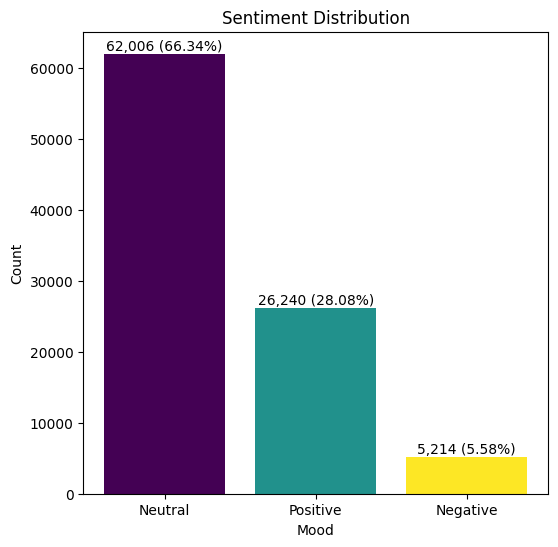

In [7]:
# Count the occurrences of each mood
mood_counts = df.Mood.value_counts().sort_index()

# Map the mood numbers to labels
mood_labels = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}
mood_counts.index = mood_counts.index.map(mood_labels)

# Define colors using 'viridis' colormap
cmap = cm.get_cmap('viridis', len(mood_counts))
colors = [cmap(i) for i in range(len(mood_counts))]

# Calculate percentages
total_count = mood_counts.sum()
mood_percentages = (mood_counts / total_count) * 100

# Create a bar plot
plt.figure(figsize=(6, 6))
bars = plt.bar(mood_counts.index, mood_counts.values, color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Mood')
plt.ylabel('Count')

# Add value annotations on the bars with comma formatting and percentages
for bar, percentage in zip(bars, mood_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height):,} ({percentage:.2f}%)',
             ha='center', va='bottom')

plt.show()

## Splitting the data to training data and test data
- Set stratify=y in train_test_split, it ensures that the class distribution in the training and testing sets is the same as in the original dataset. For example, if your original dataset has 66% 'Neutral', 27% 'Positive', and 5% 'Negative' samples, the training and testing sets will also have approximately the same proportions of these classes.  This helps to ensure that the model is trained and tested on representative samples of the data, avoiding biases that could arise from having different class distributions in the training and testing sets. Avoiding biases means preventing the situation where the model might perform well on some classes but poorly on others due to imbalanced representation in the training or testing data.

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.translated_text, df.Mood, test_size=0.2, stratify= df.Mood, random_state=42)

# Display shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (74768,)
X_test shape: (18692,)
y_train shape: (74768,)
y_test shape: (18692,)


## Model Performance For Imbalanced Data

Execution time: 215.94 s

Random Forest Results:
Accuracy: 0.9913
Precision: 0.9913
Recall: 0.9913
F1 Score: 0.9913
ROC AUC Score: 0.9993
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     49605
           1       0.99      0.98      0.99     20992
           2       0.99      0.99      0.99      4171

    accuracy                           0.99     74768
   macro avg       0.99      0.99      0.99     74768
weighted avg       0.99      0.99      0.99     74768



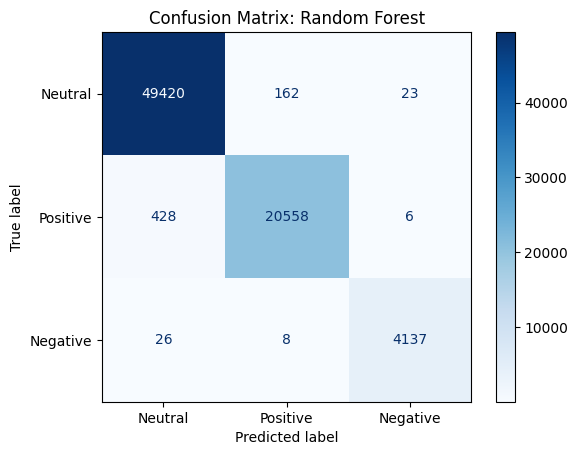

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Execution time: 13.67 s

Logistic Regression Results:
Accuracy: 0.8936
Precision: 0.9069
Recall: 0.8936
F1 Score: 0.8972
ROC AUC Score: 0.9694
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     49605
           1       0.85      0.88      0.86     20992
           2       0.59      0.95      0.73      4171

    accuracy                           0.89     74768
   macro avg       0.80      0.91      0.84     74768
weighted avg       0.91      0.89      0.90     74768



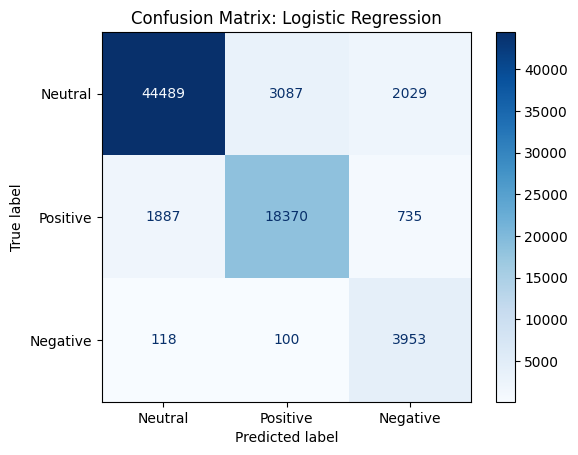

Execution time: 27.74 s

XGBoost Results:
Accuracy: 0.8987
Precision: 0.9030
Recall: 0.8987
F1 Score: 0.8934
ROC AUC Score: 0.9566
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     49605
           1       0.94      0.78      0.85     20992
           2       0.95      0.52      0.67      4171

    accuracy                           0.90     74768
   macro avg       0.92      0.76      0.82     74768
weighted avg       0.90      0.90      0.89     74768



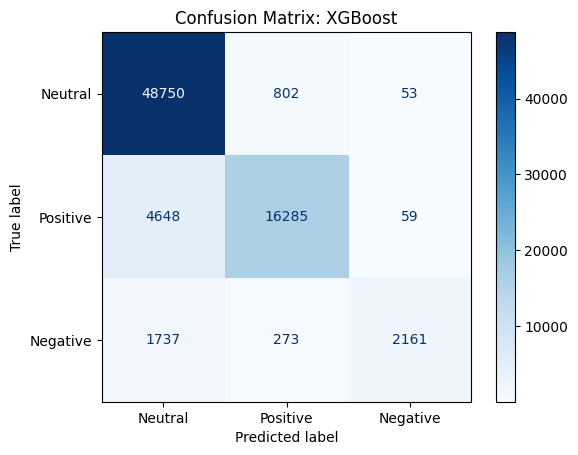

In [58]:
display_labels = ['Neutral', 'Positive', 'Negative']

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=500, class_weight='balanced',random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=3,random_state=42)
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Define the pipeline with TfidfVectorizer and the model
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()), 
        ('classifier', model)
    ])

    time_start = time.time()
    pipeline.fit(X_train, y_train)  
    y_train_pred = pipeline.predict(X_train)
    end_time = time.time() 
    execution_time = end_time - time_start
    
    # Calculate metrics on the training data
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')
    roc_auc = roc_auc_score(y_train, pipeline.predict_proba(X_train), multi_class='ovr')

    print(f"Execution time: {execution_time:.2f} s")    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_train, y_train_pred))

    cm = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


## How SMOTE (Synthetic Minority Over-sampling Technique) in our dataset:
- SMOTE helps by creating new examples of the less common moods ('Positive' and 'Negative') to balance things out. It looks at the existing 'Positive' and 'Negative' examples and creates new, similar ones by mixing them together.

In [11]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tf, y_train)

# Convert resampled data back to text form
resampled_text = tfidf_vectorizer.inverse_transform(X_train_resampled)
resampled_text = [" ".join(text) for text in resampled_text]

# Create a DataFrame
resampled_df = pd.DataFrame({'translated_text': resampled_text, 'Mood': y_train_resampled})

print(f"Original shape: {df.shape}")
print(f"Resampled shape: {resampled_df.shape, y_train_resampled.shape}")

Original shape: (93460, 6)
Resampled shape: ((148815, 2), (148815,))


In [12]:
# Count occurrences of each class
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{0: 49605, 1: 49605, 2: 49605}


In [13]:
# Save the balance dataset for Open AI  training and tuning
resampled_df.to_csv("balanced_dataset.csv",index=True)

Now, our training data is balanced, meaning it has a similar number of 'Neutral', 'Positive', and 'Negative' examples. This helps our model learn to identify all three moods more accurately.

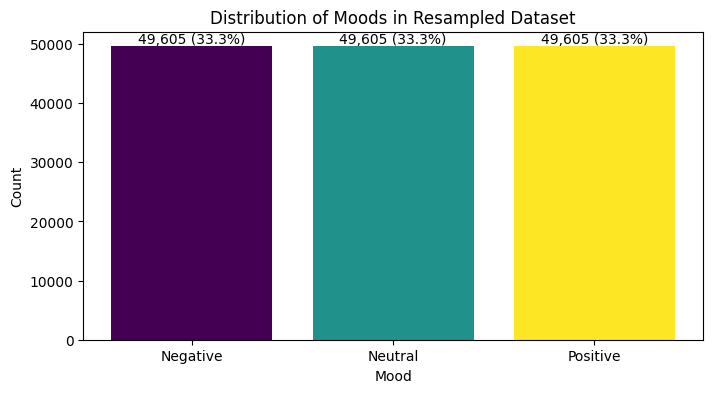

In [14]:
mood_mapping = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}
r_df = pd.DataFrame({'Mood': y_train_resampled})
r_df['Mood'] = r_df['Mood'].map(mood_mapping)

mood_counts = r_df['Mood'].value_counts().sort_index()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(mood_counts)))

plt.figure(figsize=(8, 4))
bars = plt.bar(mood_counts.index, mood_counts.values, color=colors)
plt.title('Distribution of Moods in Resampled Dataset')
plt.xlabel('Mood')
plt.ylabel('Count')

total_count = sum(mood_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height):,} ({height/total_count:.1%})',
             ha='center', va='bottom')

plt.show()

In [29]:
df['final_review'] = df['translated_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['final_review'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['common words','count']
temp.style.background_gradient(cmap='Blues')

,common words,count
0,cloud,18581
1,data,6547
2,lambda,5668
3,service,5348
4,engineer,5106
5,azure,4541
6,free,3385
7,learn,3358
8,support,3097
9,manager,2537


# Build Model and Tuning - Balanced Data
- Model Building: Construct models using Logistic Regression, Random Forest, and XGBoost.
- Parameter Tuning: Adjust default parameters to optimize model performance and improve training results.

### Logistic Regression

In [30]:
# Vectorize the text data using CountVectorizer
vectorizer_cv = CountVectorizer()
X_vect = vectorizer_cv.fit_transform(df.review)

# Split the data into training and test sets
y = df.Mood
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_vect, df.Mood, test_size=0.2,  stratify=y, random_state=42)

# Apply SMOTE to the training set only
smote_cv = SMOTE(random_state=42)
X_train_resampled_cv, y_train_resampled_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)

In [31]:
# Count occurrences of each class
unique, counts = np.unique(y_train_resampled_cv, return_counts=True)
class_distribution = dict(zip(unique, counts))

print(class_distribution)

{0: 49605, 1: 49605, 2: 49605}



Logistic Regression Results:
Accuracy: 0.8818
Precision: 0.8834
Recall: 0.8818
F1 Score: 0.8811
ROC AUC Score: 0.9708
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     49605
           1       0.90      0.82      0.86     49605
           2       0.86      0.95      0.90     49605

    accuracy                           0.88    148815
   macro avg       0.88      0.88      0.88    148815
weighted avg       0.88      0.88      0.88    148815



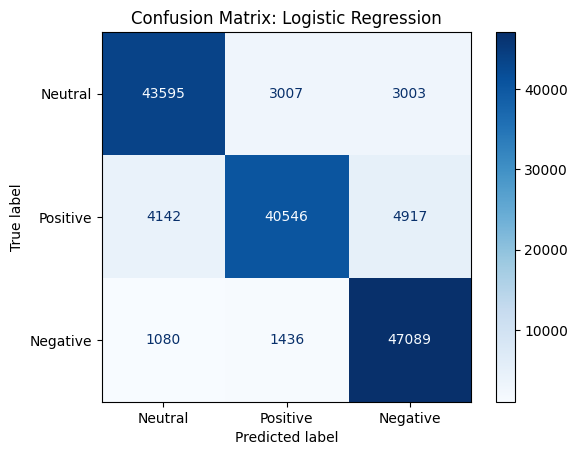

In [33]:
# Define and train the Logistic Regression model pipeline
model_LR_countv = LogisticRegression(max_iter=10000, penalty='l2', random_state=42)

# Train the model on the resampled training data
model_LR_countv.fit(X_train_resampled_cv, y_train_resampled_cv)

# Predict and evaluate the model
y_pred_train = model_LR_countv.predict(X_train_resampled_cv)
y_pred_test = model_LR_countv.predict(X_test_cv)

# Evaluate the model using y_test and y_pred_test
accuracy = accuracy_score(y_train_resampled_cv, y_pred_train)
precision = precision_score(y_train_resampled_cv, y_pred_train, average='weighted')
recall = recall_score(y_train_resampled_cv, y_pred_train, average='weighted')
f1 = f1_score(y_train_resampled_cv, y_pred_train, average='weighted')
y_train_prob = model_LR_countv.predict_proba(X_train_resampled_cv)
roc_auc = roc_auc_score(y_train_resampled_cv, y_train_prob, multi_class='ovr')

#print("Training accuracy Score: ", model_LR_countv.score(X_train_resampled_cv, y_train_resampled_cv))
#print("Testing accuracy Score: ", accuracy)
print(f"\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print('Classification Report:\n', classification_report(y_train_resampled_cv, y_pred_train))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_train_resampled_cv, y_pred_train)
display_labels = ['Neutral', 'Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix: Logistic Regression")
plt.show()




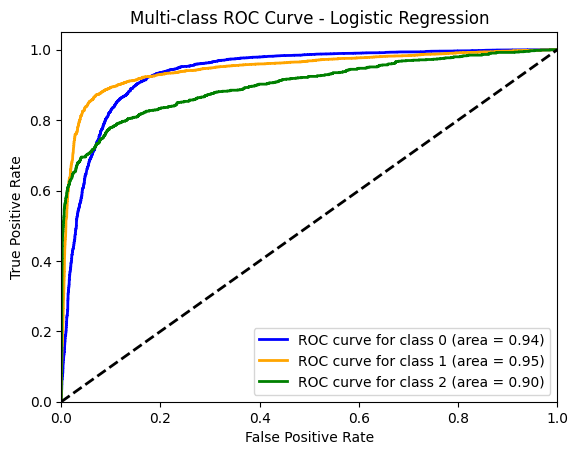

In [35]:
# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate the probability estimates
y_pred_prob = model_LR_countv.predict_proba(X_test_cv)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Random Forest Classifier 


Random Forest Classifier Results:
Accuracy: 0.9464
Precision: 0.9472
Recall: 0.9464
F1 Score: 0.9464
ROC AUC Score: 0.9935
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     49605
           1       0.95      0.92      0.93     49605
           2       0.92      0.97      0.94     49605

    accuracy                           0.95    148815
   macro avg       0.95      0.95      0.95    148815
weighted avg       0.95      0.95      0.95    148815



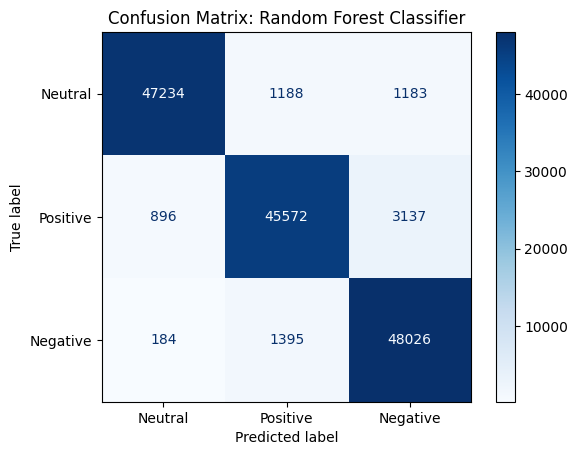

In [36]:
# Define and train the Random Forest model pipeline
model_rf_countv = RandomForestClassifier(
    #n_estimators=100,        # Number of trees in the forest
    #max_depth=None,          # Maximum depth of the trees
    random_state=42,          # Seed for reproducibility
    n_jobs=-1                 # Use all available CPU cores
)

# Train the model on the resampled training data
model_rf_countv.fit(X_train_resampled_cv, y_train_resampled_cv)

# Predict and evaluate the model
y_pred_train = model_rf_countv.predict(X_train_resampled_cv)
y_pred_test = model_rf_countv.predict(X_test_cv)

# Evaluate the model using y_test and y_pred_test
accuracy = accuracy_score(y_train_resampled_cv, y_pred_train)
precision = precision_score(y_train_resampled_cv, y_pred_train, average='weighted')
recall = recall_score(y_train_resampled_cv, y_pred_train, average='weighted')
f1 = f1_score(y_train_resampled_cv, y_pred_train, average='weighted')
y_train_prob = model_rf_countv.predict_proba(X_train_resampled_cv)
roc_auc = roc_auc_score(y_train_resampled_cv, y_train_prob, multi_class='ovr')

#print("Training accuracy Score: ", model_LR_countv.score(X_train_resampled_cv, y_train_resampled_cv))
#print("Testing accuracy Score: ", accuracy)
print(f"\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print('Classification Report:\n', classification_report(y_train_resampled_cv, y_pred_train))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_train_resampled_cv, y_pred_train)
display_labels = ['Neutral', 'Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix: Random Forest Classifier")
plt.show()

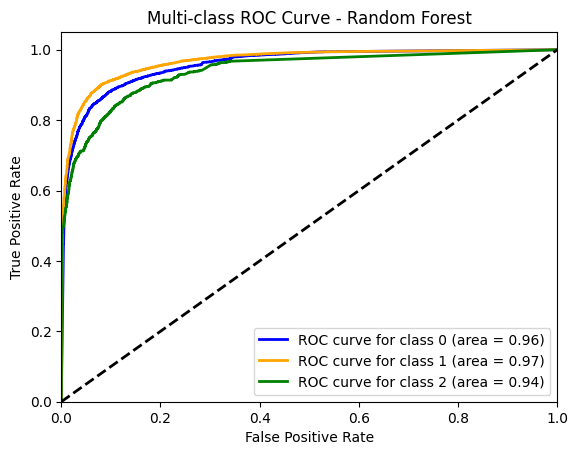

In [37]:
# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate the probability estimates
y_pred_prob = model_rf_countv.predict_proba(X_test_cv)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


### XGBoost


XGBoost Results:
Accuracy: 0.8828
Precision: 0.8941
Recall: 0.8828
F1 Score: 0.8833
ROC AUC Score: 0.9694
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     49605
           1       0.94      0.80      0.86     49605
           2       0.95      0.89      0.92     49605

    accuracy                           0.88    148815
   macro avg       0.89      0.88      0.88    148815
weighted avg       0.89      0.88      0.88    148815



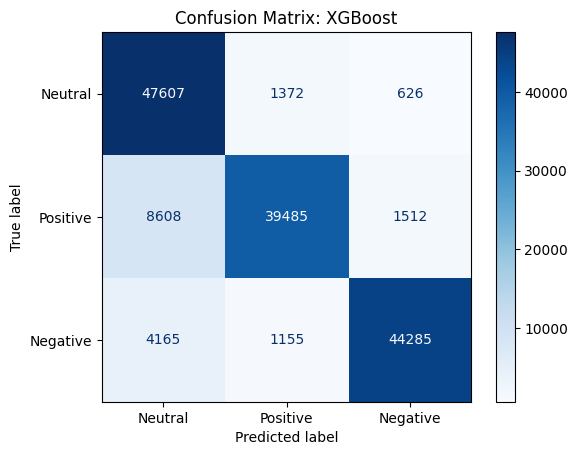

In [38]:
# Define and train the XGBoost model
model_xgb_countv = XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    num_class=3,
    random_state=42,           
    use_label_encoder=False,   # Disable the label encoder warning
    eval_metric='mlogloss',    # Evaluation metric for multi-class classification
    objective='multi:softmax'
)
# Train the model on the resampled training data
model_xgb_countv.fit(X_train_resampled_cv, y_train_resampled_cv)

# Predict and evaluate the model
y_pred_train = model_xgb_countv.predict(X_train_resampled_cv)
y_pred_test = model_xgb_countv.predict(X_test_cv)

# Evaluate the model using y_test and y_pred_test
accuracy = accuracy_score(y_train_resampled_cv, y_pred_train)
precision = precision_score(y_train_resampled_cv, y_pred_train, average='weighted')
recall = recall_score(y_train_resampled_cv, y_pred_train, average='weighted')
f1 = f1_score(y_train_resampled_cv, y_pred_train, average='weighted')
y_train_prob = model_xgb_countv.predict_proba(X_train_resampled_cv)
roc_auc = roc_auc_score(y_train_resampled_cv, y_train_prob, multi_class='ovr')

#print("Training accuracy Score: ", model_LR_countv.score(X_train_resampled_cv, y_train_resampled_cv))
#print("Testing accuracy Score: ", accuracy)
print(f"\nXGBoost Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print('Classification Report:\n', classification_report(y_train_resampled_cv, y_pred_train))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_train_resampled_cv, y_pred_train)
display_labels = ['Neutral', 'Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix: XGBoost")
plt.show()

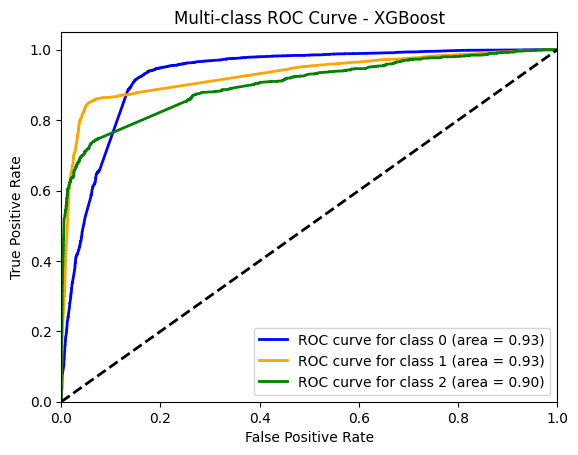

In [39]:
# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate the probability estimates
y_pred_prob = model_xgb_countv.predict_proba(X_test_cv)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


# Model - Summary
- Random Forest remains the top performer with the highest accuracy, precision, recall, f1-score andROC AUC score.
- Logistic Regression  and XGBoost shows good performance as well 

# Stacking Ensemble
- Given these results, Random Forest seems to be the most robust model for your dataset. However, XGBoost and Logistic Regresion could be beneficial for specific scenarios or in combination with other models to improve performance.

Stacking Ensemble Model Performance:
Accuracy: 0.9634
Precision: 0.9634
Recall: 0.9634
F1 Score: 0.9634
ROC AUC Score: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     49605
           1       0.96      0.95      0.95     49605
           2       0.96      0.97      0.97     49605

    accuracy                           0.96    148815
   macro avg       0.96      0.96      0.96    148815
weighted avg       0.96      0.96      0.96    148815



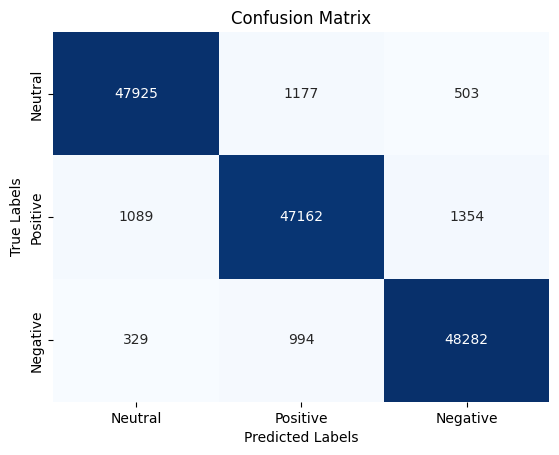

In [42]:
# Train base models
xgb_model = model_xgb_countv
rf_model = model_rf_countv
lr_model = model_LR_countv

# Generate predictions for the meta-model
xgb_train_preds = xgb_model.predict_proba(X_train_resampled_cv)
rf_train_preds = rf_model.predict_proba(X_train_resampled_cv)
lr_train_preds = lr_model.predict_proba(X_train_resampled_cv)

# Combine predictions into a new feature matrix for the meta-model
meta_features_train = np.hstack((xgb_train_preds, rf_train_preds, lr_train_preds))

# Train meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features_train, y_train_resampled_cv)

# Make predictions on the test set
#xgb_test_preds = xgb_model.predict_proba(X_test_tf)
#rf_test_preds = rf_model.predict_proba(X_test_tf)
#lr_test_preds = lr_model.predict_proba(X_test_tf)

# Combine test set predictions
#meta_features_test = np.hstack((xgb_test_preds, rf_test_preds, lr_test_preds))

# Final predictions using the meta-model
final_predictions = meta_model.predict(meta_features_train)

# Evaluate the model
print("Stacking Ensemble Model Performance:")
#print(f"Accuracy: {accuracy_score(y_test, final_predictions):.4f}")
accuracy = accuracy_score(y_train_resampled_cv, final_predictions)
precision = precision_score(y_train_resampled_cv, final_predictions, average='weighted')
recall = recall_score(y_train_resampled_cv, final_predictions, average='weighted')
f1 = f1_score(y_train_resampled_cv, final_predictions, average='weighted')
roc_auc = roc_auc_score(y_train_resampled_cv, model_LR_countv.predict_proba(X_train_resampled_cv), multi_class='ovr')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_train_resampled_cv, final_predictions))

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_train_resampled_cv, final_predictions)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


We are currently deciding between the Random Forest and Stacking Ensemble models, as both have achieved a high metric performance of 97%. The next step is to evaluate both models using an unseen dataset to determine which performs better in practice.


##  Perform Test from Sample Test Dataset by Batch

### Stacking Ensemble
- The script evaluates the performance of a stacking ensemble model on a test set, analyzes a subset of the test samples for detailed insights.
- Change 'num_test' to any number of test samples. Initially test it to 1000 records.

In [44]:
# Define the pipeline with the stacking model
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 1000)         

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  
    ('stacking', meta_model)  
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Print overall accuracy
print("Stacking Ensemble Model Performance:")
overall_acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_acc:.4f}")

# Ensure X_test is a DataFrame
if isinstance(X_test, pd.Series):
    X_test = X_test.reset_index(drop=True)

# Define mapping from Mood integer to class names
mood_mapping = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}

# Ensure we do not exceed the number of available samples
num_test = 1000
num_samples = min(num_test, len(X_test))  
selected_indices = list(range(num_samples))

# Prepare lists to store results
results = []
total_individual_accuracy = 0
mismatch_count = 0  # Initialize count of mismatches

# Loop through the selected samples
for idx in selected_indices:
    text_sample = X_test.iloc[idx] if isinstance(X_test, pd.DataFrame) else X_test[idx]
    class_names = ['Neutral', 'Positive', 'Negative']

    # Get the predicted probabilities
    probs = y_pred_proba[idx]

    # Get the predicted class and true class
    predicted_class_idx = pipeline.predict([text_sample])[0]
    predicted_class = class_names[predicted_class_idx]
    true_class_idx = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
    true_class = class_names[true_class_idx]

    # Check if there's a mismatch
    if predicted_class != true_class:
        mismatch_count += 1

    # Calculate individual accuracy as the average of the predicted probabilities
    individual_accuracy = ((probs[0] + probs[1] + probs[2]) / 3)
    total_individual_accuracy += individual_accuracy  

    # Append results to the list
    results.append({
        'Review ID': idx,
        'Review Text': textwrap.fill(text_sample, 400),
        'P(Neutral)': f'{probs[0]:.4f}',
        'P(Positive)': f'{probs[1]:.4f}',
        'P(Negative)': f'{probs[2]:.4f}',
        'True Class': true_class,
        'Predicted Class': predicted_class,
    })

# Calculate overall accuracy as the average of individual accuracies
overall_acc = total_individual_accuracy / num_samples

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Generate timestamp for the filename
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Save the DataFrame to a CSV file with timestamp
csv_filename = f"Stacking_Ensemble_Model_Performance_{mismatch_count}_{num_samples}.csv"
results_df.to_csv(csv_filename, index=False)

# Display the results as a table
print(results_df)

# Print the count of mismatches
print(f"Number of mismatches: {mismatch_count}")

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Ensemble Model Performance:
Overall Accuracy: 0.8967
     Review ID                                                   Review Text P(Neutral) P(Positive) P(Negative) True Class Predicted Class
0            0  fully backup process minute with fluid searchable free trial     0.7277      0.2627      0.0096   Positive         Neutral
1            1                                                mobile android     0.8415      0.1474      0.0111    Neutral         Neutral
2            2             struggling build application master data pipeline     0.2732      0.0873      0.6396   Negative        Negative
3            3                                        support protocol learn     0.0703      0.9243      0.0055   Positive        Positive
4            4                     launch migration service preview customer     0.9387      0.0535      0.0079    Neutral         Neutral
..         ...                                                           ...        ...         ...     

In [48]:
# Filter the DataFrame for rows where True Class is not equal to Predicted Class
sample_test = pd.read_csv(r"Stacking_Ensemble_Model_Performance_111_1000.csv")
mismatched_records = sample_test[sample_test['True Class'] != sample_test['Predicted Class']]

# Display only specific columns
columns_to_display = ['Review Text', 'P(Neutral)', 'P(Positive)', 'P(Negative)', 'True Class', 'Predicted Class']

# Save mismatched records to a new CSV file
mismatched_records.to_csv('Mismatched_Records_EM.csv', index=False)

In [50]:
# Filter the DataFrame for rows where True Class is not equal to Predicted Class
print(f"Shape: {sample_test.shape}")
print()
mismatched_records = sample_test[sample_test['True Class'] != sample_test['Predicted Class']]
print(f"Stacking Ensemble Prediction Error: {len(mismatched_records)}")

# Display only specific columns
columns_to_display = ['Review Text', 'P(Neutral)', 'P(Positive)', 'P(Negative)', 'True Class', 'Predicted Class']
print(mismatched_records[columns_to_display].head(10))


Shape: (1000, 7)

Stacking Ensemble Prediction Error: 111
                                                                               Review Text  P(Neutral)  P(Positive)  P(Negative) True Class Predicted Class
0                             fully backup process minute with fluid searchable free trial      0.7277       0.2627       0.0096   Positive         Neutral
8   engineer experience shipping code live production environment willingness learn docker      0.8919       0.1044       0.0038   Positive         Neutral
9                               given momentum underestimate insane business forget retail      0.6357       0.2659       0.0984   Negative         Neutral
11                  what priced like glacier cheap store take somewhere expensive retrieve      0.3240       0.5681       0.1079    Neutral        Positive
23                                     fair point carry also life much easier learn docker      0.8438       0.1371       0.0192   Positive         Neutral
29    

### Random Forest
- The script evaluates the performance of a random forest model on a test set, analyzes a subset of the test samples for detailed insights.
- Change 'num_test' to any number of test samples. Initially test it to 1000 records.

In [52]:
# Define the pipeline with the stacking model
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorizer included in the pipeline
    ('stacking', model_rf_countv)  # Stacking model included in the pipeline
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Print overall accuracy
print("Random Forest Model Performance:")
overall_acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_acc:.4f}")

# Ensure X_test is a DataFrame
if isinstance(X_test, pd.Series):
    X_test = X_test.reset_index(drop=True)

# Define mapping from Mood integer to class names
mood_mapping = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}

# Ensure we do not exceed the number of available samples
num_test = 1000
num_samples = min(num_test, len(X_test))  
selected_indices = list(range(num_samples))

# Prepare lists to store results
results = []
total_individual_accuracy = 0
mismatch_count = 0  # Initialize count of mismatches

# Loop through the selected samples
for idx in selected_indices:
    text_sample = X_test.iloc[idx] if isinstance(X_test, pd.DataFrame) else X_test[idx]
    class_names = ['Neutral', 'Positive', 'Negative']

    # Get the predicted probabilities
    probs = y_pred_proba[idx]

    # Get the predicted class and true class
    predicted_class_idx = pipeline.predict([text_sample])[0]
    predicted_class = class_names[predicted_class_idx]
    true_class_idx = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
    true_class = class_names[true_class_idx]

    # Check if there's a mismatch
    if predicted_class != true_class:
        mismatch_count += 1

    # Calculate individual accuracy as the average of the predicted probabilities
    individual_accuracy = ((probs[0] + probs[1] + probs[2]) / 3)
    total_individual_accuracy += individual_accuracy  

    # Append results to the list
    results.append({
        'Review ID': idx,
        'Review Text': textwrap.fill(text_sample, 400),
        'P(Neutral)': f'{probs[0]:.4f}',
        'P(Positive)': f'{probs[1]:.4f}',
        'P(Negative)': f'{probs[2]:.4f}',
        'True Class': true_class,
        'Predicted Class': predicted_class,
    })

# Calculate overall accuracy as the average of individual accuracies
overall_acc = total_individual_accuracy / num_samples

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Generate timestamp for the filename
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Save the DataFrame to a CSV file with timestamp
csv_filename = f"Random_Forest_Model_Performance_{mismatch_count}_{num_samples}.csv"
results_df.to_csv(csv_filename, index=False)

# Display the results as a table
print(results_df)

# Print the count of mismatches
print(f"Number of mismatches: {mismatch_count}")


Random Forest Model Performance:
Overall Accuracy: 0.9428
     Review ID                                                   Review Text P(Neutral) P(Positive) P(Negative) True Class Predicted Class
0            0  fully backup process minute with fluid searchable free trial     0.0800      0.9100      0.0100   Positive        Positive
1            1                                                mobile android     1.0000      0.0000      0.0000    Neutral         Neutral
2            2             struggling build application master data pipeline     0.0000      0.0000      1.0000   Negative        Negative
3            3                                        support protocol learn     0.0000      1.0000      0.0000   Positive        Positive
4            4                     launch migration service preview customer     0.9013      0.0987      0.0000    Neutral         Neutral
..         ...                                                           ...        ...         ...         

In [ ]:
# Filter the DataFrame for rows where True Class is not equal to Predicted Class
sample_test_rf = pd.read_csv(r"Random_Forest_Model_Performance_57_1000.csv")
mismatched_records = sample_test_rf[sample_test_rf['True Class'] != sample_test_rf['Predicted Class']]

# Display only specific columns
columns_to_display = ['Review Text', 'P(Neutral)', 'P(Positive)', 'P(Negative)', 'True Class', 'Predicted Class']

# Save mismatched records to a new CSV file
mismatched_records.to_csv('Mismatched_Records_EM.csv', index=False)

In [ ]:
# Filter the DataFrame for rows where True Class is not equal to Predicted Class
print(f"Shape: {sample_test_rf.shape}")
print()
mismatched_records = sample_test_rf[sample_test_rf['True Class'] != sample_test_rf['Predicted Class']]
print(f"Random Forest Prediction Error: {len(mismatched_records)}")

# Display only specific columns
columns_to_display = ['Review Text', 'P(Neutral)', 'P(Positive)', 'P(Negative)', 'True Class', 'Predicted Class']
print(mismatched_records[columns_to_display].head(10))


Shape: (1000, 7)

Random Forest Prediction Error: 57
                                                                                Review Text  P(Neutral)  P(Positive)  P(Negative) True Class Predicted Class
8    engineer experience shipping code live production environment willingness learn docker      0.9200       0.0700         0.01   Positive         Neutral
23                                      fair point carry also life much easier learn docker      0.8386       0.1414         0.02   Positive         Neutral
29                        ever axed popular service that always biggest fear cloud platform      0.3400       0.3900         0.27    Neutral        Positive
37                                              found marina democratic union freedom union      0.4400       0.4700         0.09    Neutral        Positive
44                                               innovative cloud solution data integration      0.4414       0.5586         0.00    Neutral        Positive
88   

In [55]:
from lime.lime_text import LimeTextExplainer
from IPython.display import display, HTML

# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Neutral', 'Positive', 'Negative'])

# Define a function to predict probabilities
def predict_proba(texts):
    return pipeline.predict_proba(texts)

# Explain a specific instance
idx = 9  # Index of the instance to explain
text_instance = X_test.iloc[idx]
explanation = explainer.explain_instance(text_instance, predict_proba)

# Convert explanation to HTML
html_explanation = explanation.as_html()

# Display the explanation with custom CSS
display(HTML(html_explanation))


### Cross-validation

Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple folds.
This process helps in evaluating the performance of the model while handling class imbalance and ensuring reproducibility through the use of random states.

Model training and evaluation, where in each fold, the model is trained on the training set and evaluated on the test set. This process is repeated for all folds, and the performance metrics are averaged to get an overall assessment.

Random Forest Cross-validation

In [ ]:
# Define the pipeline with Random Forest
rf_model = RandomForestClassifier(random_state=42)
SMOTE_pipeline_rf = make_pipeline(smote, rf_model)

def model_cv(splits, X, Y, pipeline, average_method):
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy, precision, recall, f1 = [], [], [], []
    
    for train_index, test_index in kfold.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # Fit the model on the training set
        model_fit = pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model_fit.predict(X_test)
        
        # Calculate scores
        accuracy.append(model_fit.score(X_test, y_test) * 100)
        precision.append(precision_score(y_test, y_pred, average=average_method) * 100)
        recall.append(recall_score(y_test, y_pred, average=average_method) * 100)
        f1.append(f1_score(y_test, y_pred, average=average_method) * 100)
        
        # Print individual fold scores for debugging purposes
        print('              negative    neutral     positive')
        print('precision:', precision_score(y_test, y_pred, average=None))
        print('recall:   ', recall_score(y_test, y_pred, average=None))
        print('f1 score: ', f1_score(y_test, y_pred, average=None))
        print('-'*50)
    
    # Print overall scores
    print("accuracy: %.2f%%" % np.mean(accuracy))
    print("precision: %.2f%%" % np.mean(precision))
    print("recall: %.2f%%" % np.mean(recall))
    print("f1 score: %.2f%%" % np.mean(f1))

# Perform cross-validation
model_cv(5, X_train_resampled, y_train_resampled, SMOTE_pipeline_rf, 'macro')


              negative    neutral     positive
precision: [0.95008913 0.97021976 0.98901984]
recall:    [0.96703961 0.95232335 0.98961798]
f1 score:  [0.95848944 0.96118826 0.98931882]
--------------------------------------------------
              negative    neutral     positive
precision: [0.9489998  0.97232226 0.98733159]
recall:    [0.96593085 0.95252495 0.98981957]
f1 score:  [0.95739048 0.96232179 0.98857402]
--------------------------------------------------
              negative    neutral     positive
precision: [0.95191927 0.97373841 0.98914027]
recall:    [0.96986191 0.95302893 0.99153311]
f1 score:  [0.96080683 0.96327238 0.99033525]
--------------------------------------------------
              negative    neutral     positive
precision: [0.95143422 0.97509263 0.98842709]
recall:    [0.96955952 0.95494406 0.99002117]
f1 score:  [0.96041136 0.96491317 0.98922349]
--------------------------------------------------
              negative    neutral     positive
precision

Logistic Regression Cross-validation

In [ ]:
# Define the pipeline with Logistic Regression
log_reg_model = LogisticRegression(random_state=42, max_iter=10000)
SMOTE_pipeline_log_reg = make_pipeline(smote, log_reg_model)

def model_cv(splits, X, Y, pipeline, average_method):
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy, precision, recall, f1 = [], [], [], []
    
    for train_index, test_index in kfold.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # Fit the model on the training set
        model_fit = pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model_fit.predict(X_test)
        
        # Calculate scores
        accuracy.append(model_fit.score(X_test, y_test) * 100)
        precision.append(precision_score(y_test, y_pred, average=average_method) * 100)
        recall.append(recall_score(y_test, y_pred, average=average_method) * 100)
        f1.append(f1_score(y_test, y_pred, average=average_method) * 100)
        
        # Print individual fold scores for debugging purposes
        print('              negative    neutral     positive')
        print('precision:', precision_score(y_test, y_pred, average=None))
        print('recall:   ', recall_score(y_test, y_pred, average=None))
        print('f1 score: ', f1_score(y_test, y_pred, average=None))
        print('-'*50)
    
    # Print overall scores
    print("accuracy: %.2f%%" % np.mean(accuracy))
    print("precision: %.2f%%" % np.mean(precision))
    print("recall: %.2f%%" % np.mean(recall))
    print("f1 score: %.2f%%" % np.mean(f1))

# Perform cross-validation
model_cv(5, X_train_resampled, y_train_resampled, SMOTE_pipeline_log_reg, 'macro')

              negative    neutral     positive
precision: [0.88710482 0.90974804 0.93981297]
recall:    [0.89658301 0.88801532 0.95222256]
f1 score:  [0.89181873 0.89875032 0.94597707]
--------------------------------------------------
              negative    neutral     positive
precision: [0.880566   0.91384519 0.93746272]
recall:    [0.89698619 0.88418506 0.95040822]
f1 score:  [0.88870025 0.89877049 0.94389109]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88120182 0.91398747 0.93879781]
recall:    [0.89869973 0.88257232 0.95242415]
f1 score:  [0.88986476 0.89800523 0.94556189]
--------------------------------------------------
              negative    neutral     positive
precision: [0.883979   0.91504222 0.94006153]
recall:    [0.89930451 0.88478984 0.95484326]
f1 score:  [0.8915759  0.89966178 0.94739474]
--------------------------------------------------
              negative    neutral     positive
precision

### Based on these evaluations, we recommend using the Random Forest model for our text classification task due to highest accuracy and less prediction errors using the subset of the sample test data.


In [56]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(df['review'])  # Fit the vectorizer on the text data

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer_cv, vec_file)

# Save the model
with open('model_rf_tfidf.pkl', 'wb') as model_file:
    pickle.dump(model_rf_countv, model_file)
